<a href="https://colab.research.google.com/github/akashrazza/imageClassification/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Convolutional Neural Network (Covid positive Vs Normal chest xrays)

# Building the CNN

#Importing Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from keras import optimizers

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
#loading data

image_width=150
image_height=150

train_data_dir='C:\\Users\\Raj\\Downloads\\Photographs\\Photographs\\train'
validation_data_dir='C:\\Users\\Raj\\Downloads\\Photographs\\Photographs\\validation'
test_data_dir='C:\\Users\\Raj\\Downloads\\Photographs\\Photographs\\test'

train_sample=30
validation_sample=25
test_sample=30

epochs=30
batch_size=12
test_size=50

In [4]:

if K.image_data_format() == 'channels_first':
    input_shape= (3,image_width,image_height)
else :
    input_shape= (image_width,image_height,3)

In [5]:
# Data Augmentation

train_datagen= ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  rescale=1./255,
                                  horizontal_flip=True,
                                 fill_mode='nearest');

validation_datagen= ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_genarator= train_datagen.flow_from_directory(train_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode='binary')


validation_genarator= train_datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode='binary')


test_genarator= train_datagen.flow_from_directory(test_data_dir,target_size=(image_width,image_height),batch_size=test_size,class_mode='binary')

FileNotFoundError: ignored

In [ ]:
# Initialize model
Basic_CNN = Sequential()

# Layer 1
Basic_CNN.add(Conv2D(16, (3, 3), input_shape=input_shape, padding='same'))
conv1=Activation('relu')
Basic_CNN.add(conv1)
max_pool_1=MaxPooling2D(pool_size=(2, 2))
Basic_CNN.add(max_pool_1)

# Layer 2
Basic_CNN.add(Conv2D(32, (3, 3), padding='same'))
conv2=Activation('relu')
Basic_CNN.add(conv2)
max_pool_2=MaxPooling2D(pool_size=(2, 2))
Basic_CNN.add(max_pool_2)

# Layer 3
Basic_CNN.add(Conv2D(64, (3, 3), padding='same'))
Basic_CNN.add(Activation('relu'))
Basic_CNN.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
Basic_CNN.add(Flatten())
Basic_CNN.add(Dense(100))
Basic_CNN.add(Activation('relu'))
Basic_CNN.add(Dropout(0.5))

# Layer 5
Basic_CNN.add(Dense(100))
Basic_CNN.add(Activation('relu'))
Basic_CNN.add(Dropout(0.5))

# Layer 6
Basic_CNN.add(Dense(1))
Basic_CNN.add(Activation('sigmoid'))

In [ ]:
Basic_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

In [ ]:
Basic_CNN.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history=Basic_CNN.fit(train_genarator,steps_per_epoch=25,epochs=epochs,validation_data=validation_genarator,validation_steps=validation_sample)

Epoch 1/30
25/25 [==============================] - 17s 618ms/step - loss: 0.7667 - accuracy: 0.5319 - val_loss: 0.6647 - val_accuracy: 0.8200
Epoch 2/30
25/25 [==============================] - 8s 314ms/step - loss: 0.6290 - accuracy: 0.6805
Epoch 3/30
25/25 [==============================] - 8s 335ms/step - loss: 0.5184 - accuracy: 0.7156
Epoch 4/30
25/25 [==============================] - 9s 342ms/step - loss: 0.3334 - accuracy: 0.8664
Epoch 5/30
25/25 [==============================] - 7s 268ms/step - loss: 0.3103 - accuracy: 0.8622
Epoch 6/30
25/25 [==============================] - 7s 275ms/step - loss: 0.3477 - accuracy: 0.8667
Epoch 7/30
25/25 [==============================] - 7s 287ms/step - loss: 0.3813 - accuracy: 0.8933
Epoch 8/30
25/25 [==============================] - 7s 268ms/step - loss: 0.2506 - accuracy: 0.9082
Epoch 9/30
25/25 [==============================] - 7s 283ms/step - loss: 0.2468 - accuracy: 0.8783
Epoch 10/30
25/25 [==============================] - 7s 2

[[0.998356]]
outdoor


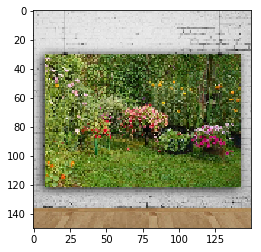

In [ ]:
#Prediction of Single image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('C:\\Users\\Raj\\Downloads\\Photographs\\Photographs\\test\\outdoor\\Laeacco-Spring-Backdrops-Green-Grass-Park-Garden-Flowers-Picnic-Outdoor-Scenic-Photography-Background-For-Photo-Studio.jpg_960x960.jpg',target_size=(150,150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = Basic_CNN.predict(img, batch_size=None,steps=1) #gives all class prob.
print(prediction)
if(prediction[:,:]>0.5):
    print('outdoor')
else:
    print('indoor')

plt.imshow(img1)
plt.show()

[[0.0392538]]
indoor


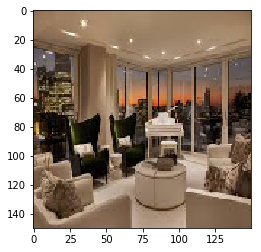

In [ ]:
#Prediction of Single image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('C:\\Users\\Raj\\Downloads\\Photographs\\Photographs\\test\\indoor\\images213.jpg',target_size=(150,150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = Basic_CNN.predict(img, batch_size=None,steps=1) #gives all class prob.
print(prediction)
if(prediction[:,:]>0.5):
    print('outdoor')
else:
    print('indoor')

plt.imshow(img1)
plt.show()